# Lab 6
by
Amir Ali
317554

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('fitness.csv')
df.head(3)

,Unnamed: 0,Age,Weight,Oxygen,RunTime,RestPulse,RunPulse,MaxPulse
0,0,44,89.47,44.609,11.37,62,178,182
1,1,44,85.84,54.297,8.65,45,156,168
2,2,38,89.02,49.874,9.22,55,178,180


## a

In [115]:
X = df.loc[:, ['Age', 'Weight', 'RunTime', 'RestPulse', 'MaxPulse']]
Y = df.loc[:, ['Oxygen']]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [118]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Weight        0
Oxygen        0
RunTime       0
RestPulse     0
RunPulse      0
MaxPulse      0
dtype: int64

In [119]:
regressor = DecisionTreeRegressor()

In [120]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [122]:
regressor.predict(X_test)

array([47.467, 51.855, 48.673, 39.442, 45.441, 45.313, 46.774])

[Text(141.24375, 207.55636363636364, 'X[2] <= 8.8\nmse = 29.409\nsamples = 24\nvalue = 47.114'),
 Text(62.775000000000006, 187.7890909090909, 'X[0] <= 43.0\nmse = 6.8\nsamples = 3\nvalue = 57.974'),
 Text(41.85, 168.0218181818182, 'X[4] <= 179.0\nmse = 0.059\nsamples = 2\nvalue = 59.813'),
 Text(20.925, 148.25454545454545, 'mse = 0.0\nsamples = 1\nvalue = 59.571'),
 Text(62.775000000000006, 148.25454545454545, 'mse = -0.0\nsamples = 1\nvalue = 60.055'),
 Text(83.7, 168.0218181818182, 'mse = 0.0\nsamples = 1\nvalue = 54.297'),
 Text(219.7125, 187.7890909090909, 'X[2] <= 12.415\nmse = 13.383\nsamples = 21\nvalue = 45.563'),
 Text(146.475, 168.0218181818182, 'X[2] <= 10.9\nmse = 6.255\nsamples = 18\nvalue = 46.711'),
 Text(104.625, 148.25454545454545, 'X[0] <= 53.0\nmse = 4.152\nsamples = 10\nvalue = 48.098'),
 Text(83.7, 128.48727272727274, 'X[3] <= 46.5\nmse = 2.871\nsamples = 9\nvalue = 47.681'),
 Text(41.85, 108.72, 'X[0] <= 46.5\nmse = 0.48\nsamples = 2\nvalue = 49.848'),
 Text(20.92

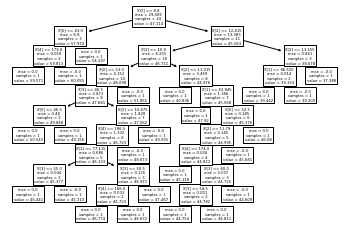

In [123]:
tree.plot_tree(regressor)

In [124]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_2 <= 8.80
|   |--- feature_0 <= 43.00
|   |   |--- feature_4 <= 179.00
|   |   |   |--- value: [59.57]
|   |   |--- feature_4 >  179.00
|   |   |   |--- value: [60.05]
|   |--- feature_0 >  43.00
|   |   |--- value: [54.30]
|--- feature_2 >  8.80
|   |--- feature_2 <= 12.41
|   |   |--- feature_2 <= 10.90
|   |   |   |--- feature_0 <= 53.00
|   |   |   |   |--- feature_3 <= 46.50
|   |   |   |   |   |--- feature_0 <= 46.50
|   |   |   |   |   |   |--- value: [50.54]
|   |   |   |   |   |--- feature_0 >  46.50
|   |   |   |   |   |   |--- value: [49.16]
|   |   |   |   |--- feature_3 >  46.50
|   |   |   |   |   |--- feature_2 <= 10.68
|   |   |   |   |   |   |--- feature_4 <= 186.50
|   |   |   |   |   |   |   |--- feature_1 <= 77.12
|   |   |   |   |   |   |   |   |--- feature_3 <= 55.00
|   |   |   |   |   |   |   |   |   |--- value: [45.44]
|   |   |   |   |   |   |   |   |--- feature_3 >  55.00
|   |   |   |   |   |   |   |   |   |--- value: [45.31]
|   |   |   |   |  

## b

In [127]:
pred = regressor.predict(X_test)
max(pred)

51.855

## d

In [136]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

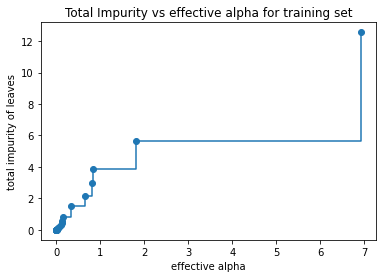

In [137]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

### e

In [143]:
X = df.loc[:, ['Age', 'RunTime']]
Y = df.loc[:, ['Oxygen']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [145]:
regressor1 = DecisionTreeRegressor()

In [146]:
regressor1.fit(X_train, y_train)

DecisionTreeRegressor()

In [147]:
reg_pred = regressor1.predict(X_test)

In [148]:
reg_pred

array([45.313, 51.855, 47.467, 39.203, 49.156, 48.673, 46.774])

In [151]:
type(reg_pred)

numpy.ndarray

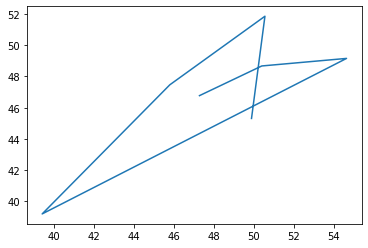

In [149]:
plt.plot(y_test, reg_pred)